**Recurrent Neural Network**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
import kerastuner.tuners as kt


<ipython-input-3-6f26bc74c682>:11: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner.tuners as kt


**PREPROCESSING DATA**

In [ ]:
data = read_csv('/content/drive/Shareddrives/Di Ricco_Barbieri_Cavedoni/whole_data_15.csv')
data = data.sample(frac=1, random_state=random.seed())
data = data[:60000]

X = data.iloc[:, 7:len(data.columns)]
y = data.iloc[:, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values

#CODICE RESHAPE
time_steps = 10
input_dim = 18
output_dim = 5

X_train = X_train.reshape(-1, time_steps, 18)  #X_train.shape[0]//time_steps
X_test = X_test.reshape(-1, time_steps, 18)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# SCALING
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, input_dim))
X_test = scaler.transform(X_test.reshape(-1, input_dim))

# riportare i dati alla forma originale
X_train = X_train.reshape((-1, time_steps, input_dim))
X_test = X_test.reshape((-1, time_steps, input_dim))

**IMPLEMENTAZIONE LSTM**



In [ ]:
# Creazione del modello LSTM
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(time_steps, input_dim)))
model.add(tf.keras.layers.LSTM(64, return_sequences=True))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(output_dim))

# Compilazione del modello
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# Addestramento del modello
history = model.fit(X_train, y_train, validation_split = 0.1, epochs=20, verbose=1, shuffle = True)

eval_result =  model.evaluate(X_test, y_test[:X_test.shape[0]])
print()
print("[test loss, test accuracy]:", eval_result)

Epoch 1/20
135/135 [==============================] - 24s 89ms/step - loss: 0.1328 - accuracy: 0.4125 - val_loss: 0.1307 - val_accuracy: 0.4021
Epoch 2/20
135/135 [==============================] - 7s 51ms/step - loss: 0.1286 - accuracy: 0.4148 - val_loss: 0.1295 - val_accuracy: 0.4354
Epoch 3/20
135/135 [==============================] - 9s 70ms/step - loss: 0.1285 - accuracy: 0.4137 - val_loss: 0.1295 - val_accuracy: 0.4437
Epoch 4/20
135/135 [==============================] - 7s 52ms/step - loss: 0.1280 - accuracy: 0.4213 - val_loss: 0.1293 - val_accuracy: 0.4250
Epoch 5/20
135/135 [==============================] - 7s 55ms/step - loss: 0.1282 - accuracy: 0.4271 - val_loss: 0.1296 - val_accuracy: 0.4271
Epoch 6/20
135/135 [==============================] - 4s 30ms/step - loss: 0.1279 - accuracy: 0.4271 - val_loss: 0.1300 - val_accuracy: 0.4083
Epoch 7/20
135/135 [==============================] - 3s 21ms/step - loss: 0.1278 - accuracy: 0.4361 - val_loss: 0.1296 - val_accuracy: 0.435

**VALIDATION GRAPHS**

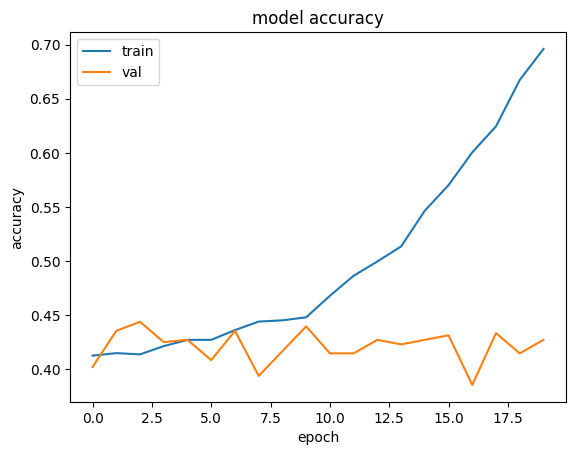

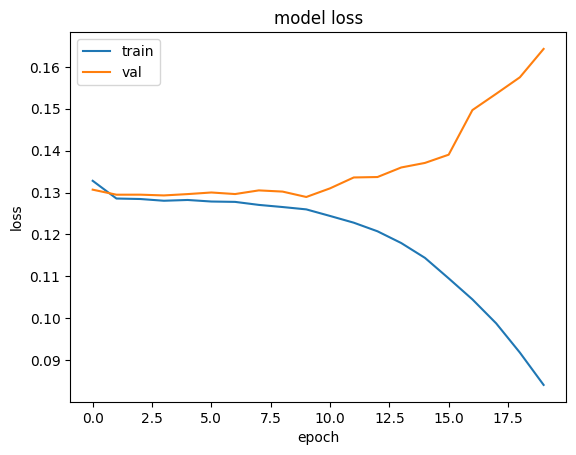

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**EARLY STOPPING**

In [ ]:
# Creazione del modello LSTM
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(time_steps, input_dim)))
model.add(tf.keras.layers.LSTM(64))
model.add(layers.Dropout(0.01))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Dense(output_dim))

# Compilazione del modello
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# training
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.1, epochs=20, verbose=1, callbacks=[early_stopping], shuffle = True)

eval_result =  model.evaluate(X_test, y_test[:X_test.shape[0]])
print()
print("[test loss, test accuracy]:", eval_result)

Epoch 1/20
135/135 [==============================] - 9s 33ms/step - loss: 0.1342 - accuracy: 0.3944 - val_loss: 0.1307 - val_accuracy: 0.4250
Epoch 2/20
135/135 [==============================] - 2s 18ms/step - loss: 0.1293 - accuracy: 0.4204 - val_loss: 0.1309 - val_accuracy: 0.3938
Epoch 3/20
135/135 [==============================] - 2s 18ms/step - loss: 0.1289 - accuracy: 0.4171 - val_loss: 0.1318 - val_accuracy: 0.3917
Epoch 4/20
38/38 [==============================] - 1s 7ms/step - loss: 0.1325 - accuracy: 0.3967

[test loss, test accuracy]: [0.1324583888053894, 0.39666667580604553]


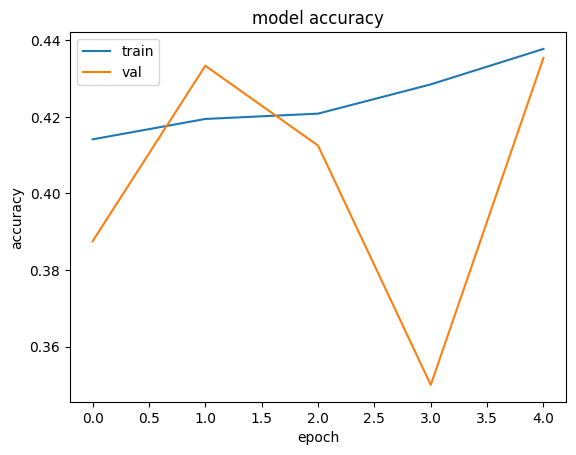

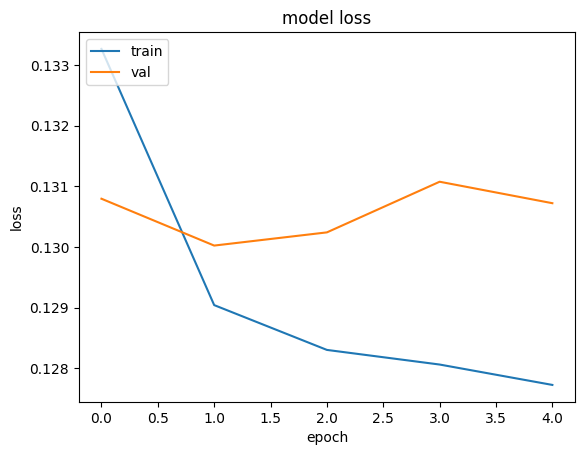

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**TUNING**

In [ ]:
def model_builder(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(units=hp.Int('units_L1_LSTM', min_value=32, max_value=512, step=32), return_sequences=True, input_shape=(time_steps, input_dim)))
    model.add(tf.keras.layers.LSTM(units=hp.Int('units_L2_LSTM', min_value=32, max_value=512, step=32)))
    model.add(layers.Dropout(hp.Choice(name='Dropout_Rate', values=[0.0, 0.1, 0.01, 0.001])))
    model.add(tf.keras.layers.Dense(units=hp.Int('units_Dense', min_value=50, max_value=500, step=50)))
    model.add(tf.keras.layers.Dense(output_dim))

    model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     overwrite=True,
                     max_epochs=10,
                     factor=3,
                     project_name='09_kerasTuner')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

tuner.search(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print()
print("Migliori iperparametri:")
for param, value in best_hps.values.items():
    print(f"{param}: {value}")
print()

Trial 30 Complete [00h 03m 11s]
val_accuracy: 0.4177083373069763

Best val_accuracy So Far: 0.4333333373069763
Total elapsed time: 00h 40m 35s

Migliori iperparametri:
units_L1_LSTM: 160
units_L2_LSTM: 320
Dropout_Rate: 0.1
units_Dense: 400
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0020



In [ ]:
# Build the model with the optimal hyperparameters and train it on the data
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1, callbacks=[stop_early], shuffle = True)

eval_result =  model.evaluate(X_test, y_test[:X_test.shape[0]])
print()
print("[test loss, test accuracy]:", eval_result)


Epoch 1/20
135/135 [==============================] - 29s 186ms/step - loss: 0.1343 - accuracy: 0.3993 - val_loss: 0.1312 - val_accuracy: 0.4021
Epoch 2/20
135/135 [==============================] - 19s 144ms/step - loss: 0.1297 - accuracy: 0.4106 - val_loss: 0.1328 - val_accuracy: 0.4187
Epoch 3/20
135/135 [==============================] - 24s 175ms/step - loss: 0.1294 - accuracy: 0.4106 - val_loss: 0.1309 - val_accuracy: 0.3771
Epoch 4/20
135/135 [==============================] - 16s 119ms/step - loss: 0.1289 - accuracy: 0.4227 - val_loss: 0.1310 - val_accuracy: 0.3896
Epoch 5/20
135/135 [==============================] - 14s 102ms/step - loss: 0.1292 - accuracy: 0.4208 - val_loss: 0.1316 - val_accuracy: 0.3583
Epoch 6/20
38/38 [==============================] - 3s 41ms/step - loss: 0.1313 - accuracy: 0.4075

[test loss, test accuracy]: [0.1312514841556549, 0.4074999988079071]
